# Bellabeat Case Study

This case study analyzes consumer usage trends from smart fitness trackers to help Bellabeat refine its marketing strategy. By exploring key variables such as steps, calories, and active minutes, we provide data-driven recommendations to improve user engagement and promote healthier habits.

In [1]:
# Load necessary libraries
library(tidyverse)
library(lubridate)
library(janitor)

# Set working directory and view file list
list.files(path = "../input/fitbit")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘janitor’




The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




[1] "mturkfitbit_export_3.12.16-4.11.16" "mturkfitbit_export_4.12.16-5.12.16"

In [2]:
# Load the daily activity data
daily_activity <- read_csv("../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

# View structure of the dataset
glimpse(daily_activity)

# Clean column names
daily_activity <- clean_names(daily_activity)

# Display summary statistics
summary(daily_activity)

Rows: 940 Columns: 15


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

       id            activity_date       total_steps    total_distance  
 Min.   :1.504e+09   Length:940         Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Mode  :character   Median : 7406   Median : 5.245  
 Mean   :4.855e+09                      Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09                      3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09                      Max.   :36019   Max.   :28.030  
 tracker_distance logged_activities_distance very_active_distance
 Min.   : 0.000   Min.   :0.0000             Min.   : 0.000      
 1st Qu.: 2.620   1st Qu.:0.0000             1st Qu.: 0.000      
 Median : 5.245   Median :0.0000             Median : 0.210      
 Mean   : 5.475   Mean   :0.1082             Mean   : 1.503      
 3rd Qu.: 7.710   3rd Qu.:0.0000             3rd Qu.: 2.053      
 Max.   :28.030   Max.   :4.9421             Max.   :21.920      
 moderately_active_distance

## Summary Statistics

The dataset includes daily activity records from smart fitness trackers. The analysis focuses on total steps, distances, calories burned, and time spent in different activity levels.

Below are summary statistics to understand user behavior patterns.

In [3]:
# Generate summary metrics
summary_stats <- daily_activity %>%
  summarise(
    avg_steps = mean(total_steps),
    avg_distance = mean(total_distance),
    avg_calories = mean(calories),
    avg_very_active_min = mean(very_active_minutes),
    avg_sedentary_min = mean(sedentary_minutes)
  )
summary_stats

avg_steps,avg_distance,avg_calories,avg_very_active_min,avg_sedentary_min
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7637.911,5.489702,2303.61,21.16489,991.2106


`geom_smooth()` using formula = 'y ~ x'


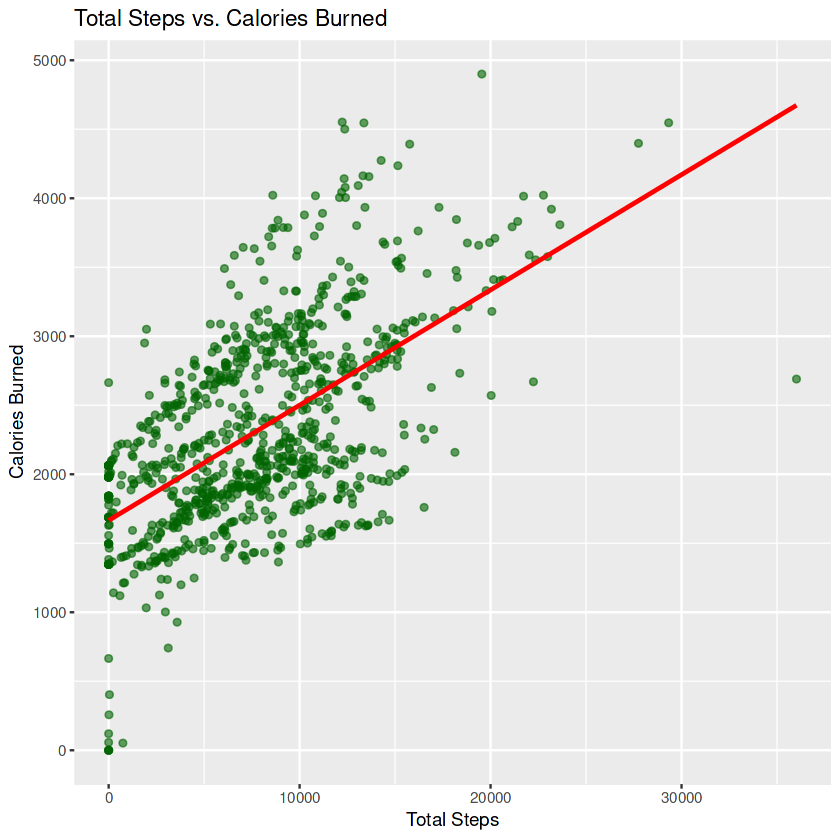

In [4]:
# Steps vs Calories correlation
ggplot(daily_activity, aes(x = total_steps, y = calories)) +
  geom_point(alpha = 0.6, color = "darkgreen") +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Total Steps vs. Calories Burned", x = "Total Steps", y = "Calories Burned")

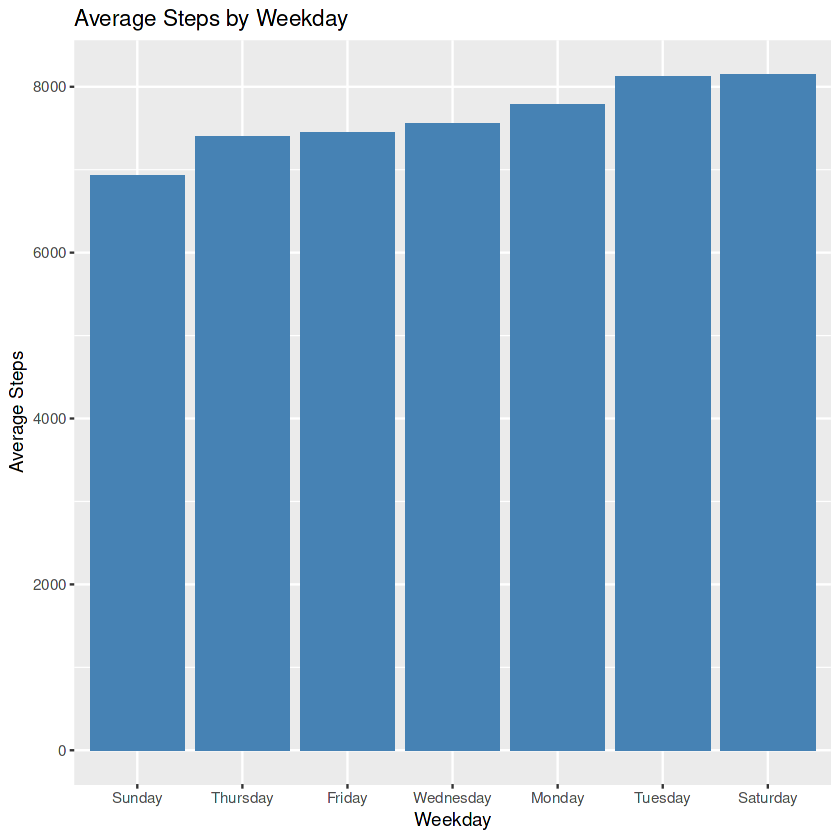

In [5]:
# Make sure activity_date is a Date
daily_activity <- daily_activity %>%
  mutate(activity_date = as.Date(activity_date, format = "%m/%d/%Y"))


# Average steps by weekday
daily_activity %>%
  mutate(weekday = weekdays(activity_date)) %>%
  group_by(weekday) %>%
  summarise(avg_steps = mean(total_steps)) %>%
  ggplot(aes(x = reorder(weekday, avg_steps), y = avg_steps)) +
  geom_col(fill = "steelblue") +
  labs(title = "Average Steps by Weekday", x = "Weekday", y = "Average Steps")

## Weekly Behavior Patterns

Users tend to walk more on certain weekdays, suggesting that Bellabeat can optimize in-app nudges, challenges, or reminders to align with periods of lower activity.

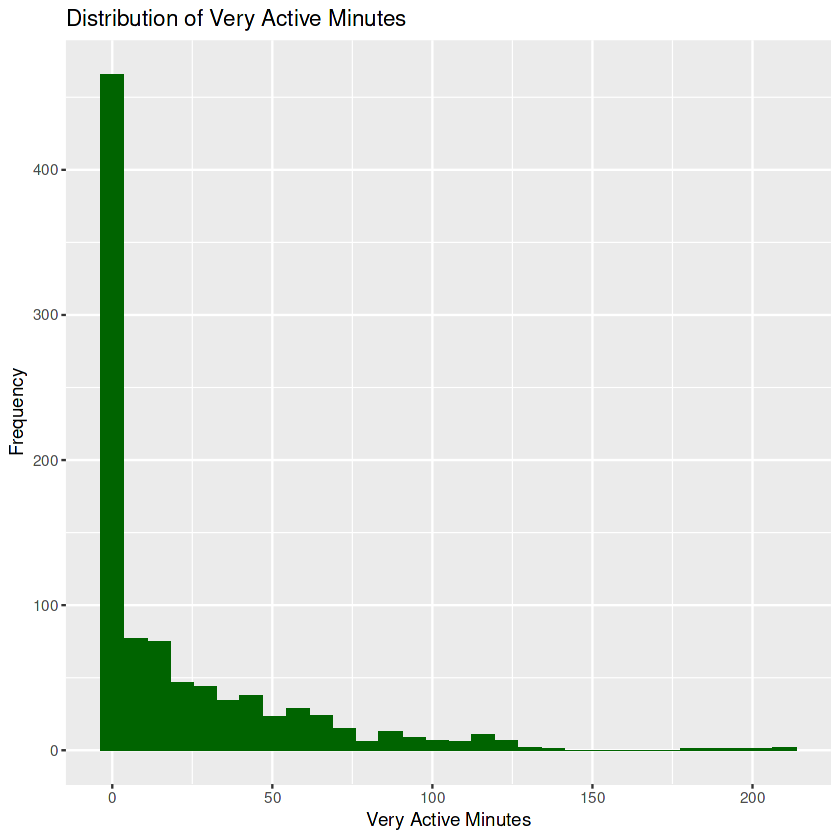

In [6]:
# Histogram of very active minutes
ggplot(daily_activity) +
  geom_histogram(aes(x = very_active_minutes), fill = "darkgreen", bins = 30) +
  labs(title = "Distribution of Very Active Minutes", 
       x = "Very Active Minutes", y = "Frequency") 

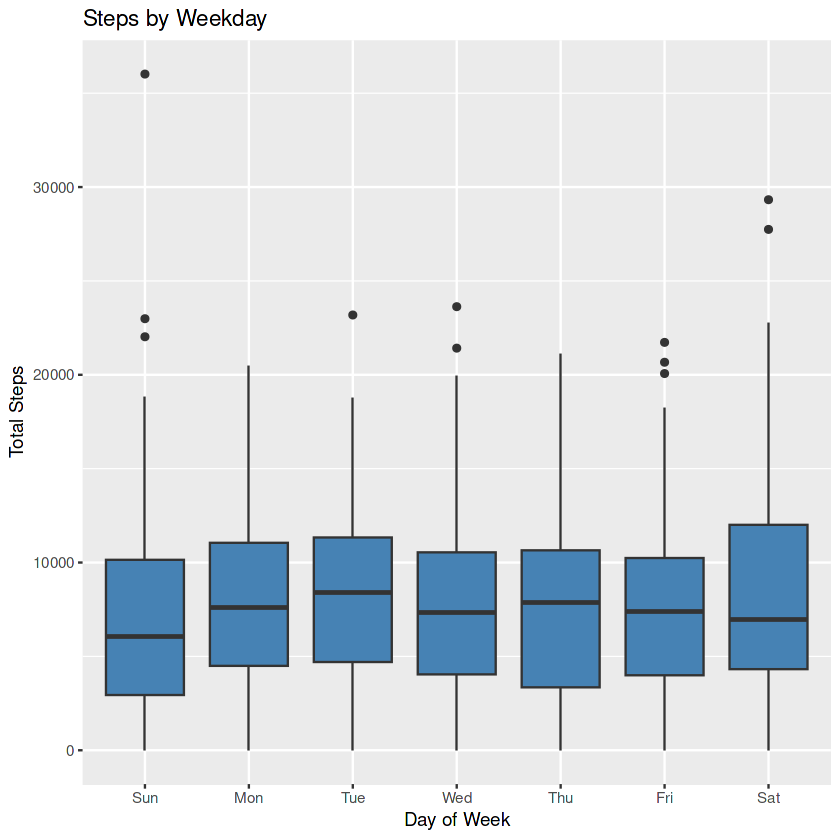

In [7]:
# Extract weekday and analyze activity patterns
daily_activity <- daily_activity %>%
  mutate(weekday = wday(activity_date, label = TRUE))

ggplot(daily_activity, aes(x = weekday, y = total_steps)) +
  geom_boxplot(fill = "steelblue") +
  labs(title = "Steps by Weekday", x = "Day of Week", y = "Total Steps")

In [8]:
# Format date, check for missing values, remove duplicates
daily_activity <- daily_activity %>%
  rename(activity_date = activity_date) %>%
  mutate(activity_date = as.Date(activity_date, format = "%m/%d/%Y"))

# Check for missing values
sum(is.na(daily_activity))

# Remove duplicate rows
daily_activity <- daily_activity %>% distinct()

[1] 0

corrplot 0.92 loaded



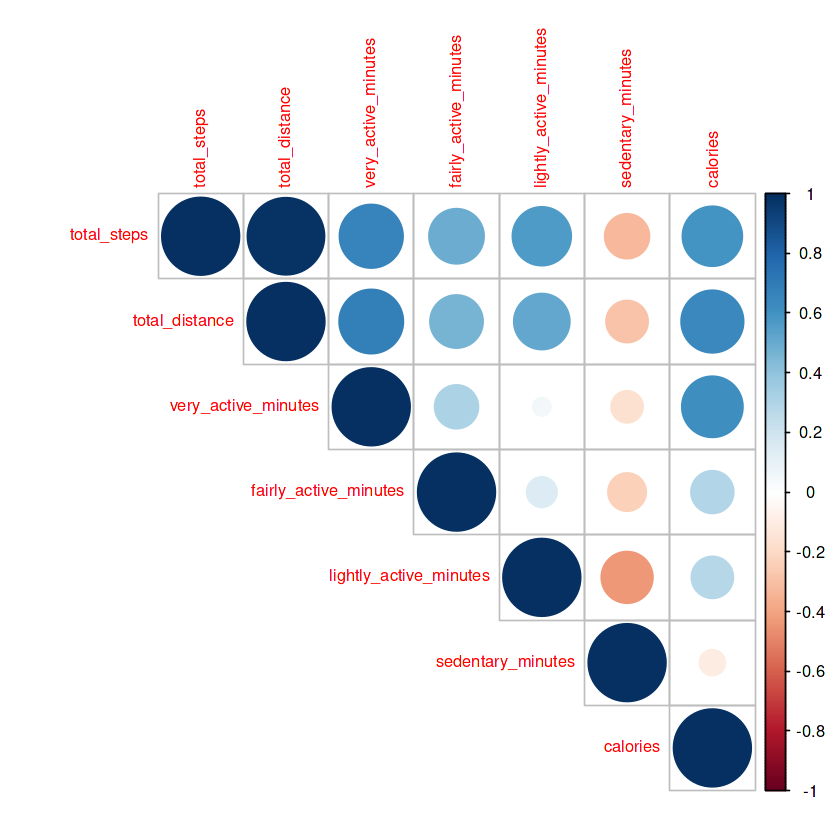

In [9]:
# Correlation matrix of key numeric variables
cor_matrix <- daily_activity %>%
  select(total_steps, total_distance, very_active_minutes, fairly_active_minutes, lightly_active_minutes, sedentary_minutes, calories) %>%
  cor()

# Visualize correlation matrix
library(corrplot)
corrplot(cor_matrix, method = "circle", type = "upper", tl.cex = 0.8)

## Correlation Insights

The correlation matrix shows that **Total Steps**, **Very Active Minutes**, and **Total Distance** are all positively correlated with **Calories Burned**, confirming that more physical activity drives higher energy expenditure.

**Sedentary Minutes** has a weak or negative correlation, which supports our focus on active movement metrics in the marketing strategy.

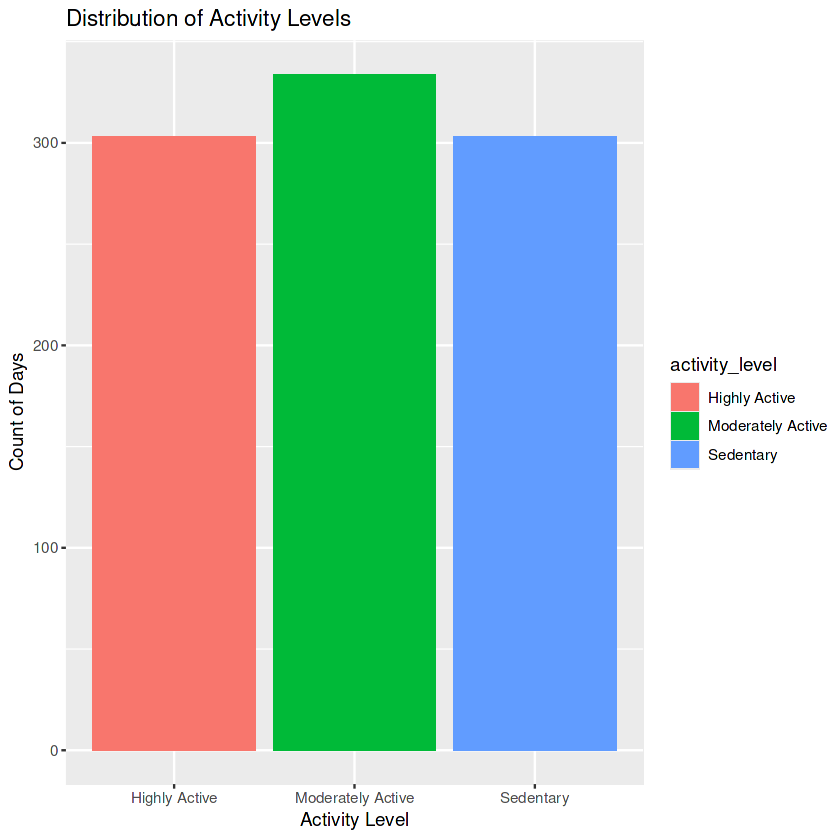

In [10]:
# Create user activity level
daily_activity <- daily_activity %>%
  mutate(activity_level = case_when(
    total_steps < 5000 ~ "Sedentary",
    total_steps < 10000 ~ "Moderately Active",
    TRUE ~ "Highly Active"
  ))

# Count of days in each category
daily_activity %>%
  count(activity_level) %>%
  ggplot(aes(x = activity_level, y = n, fill = activity_level)) +
  geom_bar(stat = "identity") +
  labs(title = "Distribution of Activity Levels", x = "Activity Level", y = "Count of Days")

## User Segmentation

By grouping users into activity levels, Bellabeat can design **personalized fitness journeys** in-app, offering customized goals for sedentary vs. highly active users.

### Key Insights for Bellabeat:

- The average user walks around **7,638 steps** and burns approximately **2,304 calories per day**.
- There is a strong positive correlation between total steps and calories burned.
- Most users have relatively low "very active minutes," suggesting moderate engagement.
- Bellabeat can encourage users to increase active minutes through gamification and smart nudges.

### Recommendation:
Design marketing strategies emphasizing how Bellabeat products promote **daily activity**, **goal tracking**, and **calorie awareness**.

## Recommendation:

Design marketing strategies emphasizing how Bellabeat products promote **daily activity**, **goal tracking**, and **calorie awareness**.

## Supporting Observations:

Users who logged over 10,000 steps consistently burned more than 2,500 calories per day. However, light activity and sedentary minutes showed little correlation to total calorie expenditure.

## Marketing Strategy Suggestions:

- Emphasize step-based goals and active minutes in the Bellabeat app, since these metrics align closely with calories burned.
- Introduce gamification features around very active minutes to drive engagement.
- Focus marketing on high-engagement user segments: those who hit 10K+ steps/day.

## Conclusion

This analysis demonstrates how Bellabeat can leverage wearable data to guide smarter, more personalized marketing and product engagement strategies. It highlights the power of R, tidyverse, and data storytelling to transform raw tracking data into actionable insights.

_This analysis was performed using the FitBit Fitness Tracker Dataset.  
Code and visualizations created in R using **ggplot2**, **dplyr**, and **tidyverse**._
